# Домашнее задание 9

Это домашнее задание по материалам 12го семинара. Дедлайн по отправке - 23:55 5 мая. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_9

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим одномерную задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}} f(x) = x \arctan x - \frac{1}{2} \log (1 + x^2).
\end{equation}

__(а)__ Реализуйте для этой задачи метод градиентного спуска и метод Ньютона. Нарисуйте графики сходимости данных методов для двух разных точек старта $x^0 = 1.3$ и $x^0 = 1.5$. Сделайте вывод. В общем случае для каких $x^0$ еще есть сходимость метода Ньютона, а для каких она пропадает? Почему?

Для того чтобы ответить на этот вопрос, сначала найдем производные функции $f(x)$: 


$$f'(x) = \arctan(x)$$
$$f''(x) = \frac{1}{1+x^2}$$


In [1]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import LinearRegression
import time 
from scipy.stats import special_ortho_group, ortho_group
import matplotlib.gridspec as gridspec
import random

In [2]:
## Adding constants
L = 1000
mu = 0.01
d = 100
E = np.eye(d)
llambda = 1

In [3]:
def generate_matrix(d_local, mu_local, L_local):
    i = 0
    while i == 0:
        diagonal_entries = np.random.uniform(mu_local, L_local, d_local)
        diagonal_entries[0] = mu_local
        diagonal_entries[1] = L_local
        D = np.diag(diagonal_entries)
        m = special_ortho_group.rvs(d_local)
        A = (np.linalg.inv(m).dot(D)).dot(m)
        np.set_printoptions(suppress=True)
        if (is_pos_def(A-mu_local*E)):
            i += 1
    return A
    
def is_pos_def(x): #проверка положительной определённости
    return np.all(np.linalg.eigvals(x) > 0)

def gradient(x): 
    return np.arctan(x)

def hessian(x):
    return(1/(1 + x**2))

In [14]:
def gradient_descent(start, learn_rate, n_iter):
    values_x = []
    values_y = []
    vector = start
    vector_list = []
    grad = gradient(vector)
    i = 0
    while(grad > 1e-10 and i < n_iter):
        vector = vector - learn_rate * (grad)
        grad = gradient(vector)
        values_x.append(i+1)
        values_y.append(grad ** 2)
        vector_list.append(vector)
        i += 1
    return values_x, values_y, vector

def newton(start, learn_rate, n_iter):
    values_x = []
    values_y = []
    vector = start
    vector_list = []
    grad = gradient(vector)
    i = 0
    while(grad > 1e-10 and i < n_iter):
        vector = vector - learn_rate * (grad)
        grad = gradient(vector)
        values_x.append(i+1)
        values_y.append(grad ** 2)
        vector_list.append(vector)
        i += 1
    return values_x, values_y, vector

In [20]:
start = 1.3
gamma1 = 1/L
n_gd, x_gd, vector_gd = gradient_descent(start, gamma1, 10000)
gamma2 = 1
n_newton, x_newton, vector_newton = newton(start, gamma2, 10)

start1 = 1.5
n_gd_2, x_gd_2, vector_gd_2 = gradient_descent(start1, gamma1, 10000)
n_newton_2, x_newton_2, vector_newton_2 = newton(start1, gamma2, 10)

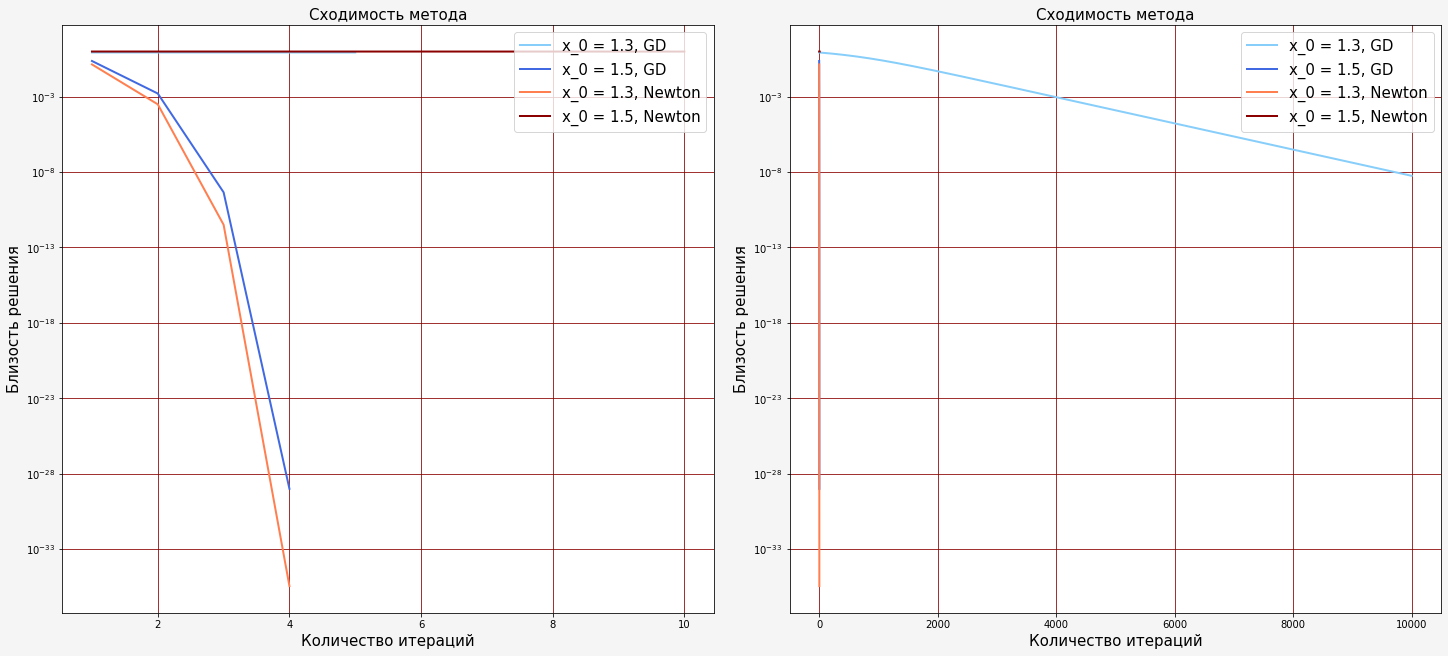

In [21]:
fg = plt.figure(figsize=(20, 9), constrained_layout=True, facecolor = "whitesmoke")
gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fg)

fig_ax_1 = fg.add_subplot(gs[0, 0], facecolor = "white")

fig_ax_1.plot(n_gd[:5:1], x_gd[:5:1], 'lightskyblue', label = 'x_0 = 1.3, GD', linewidth=2)
fig_ax_1.plot(n_gd_2[:5:1], x_gd_2[:5:1], 'royalblue', label = 'x_0 = 1.5, GD', linewidth=2)
fig_ax_1.plot(n_newton[::1], x_newton[::1], 'coral', label = 'x_0 = 1.3, Newton', linewidth=2)
fig_ax_1.plot(n_newton_2[::1], x_newton_2[::1], 'darkred', label = 'x_0 = 1.5, Newton', linewidth=2)
fig_ax_1.legend(loc="upper right", fontsize=15)
fig_ax_1.semilogy()
fig_ax_1.set_xlabel("Количество итераций", fontsize=15)
fig_ax_1.set_ylabel("Близость решения", fontsize=15)
fig_ax_1.set_title('Сходимость метода', fontsize=15)
fig_ax_1.grid(color='darkred')

fig_ax_1 = fg.add_subplot(gs[0, 1], facecolor = "white")
fig_ax_1.plot(n_gd[::1], x_gd[::1], 'lightskyblue', label = 'x_0 = 1.3, GD', linewidth=2)
fig_ax_1.plot(n_gd_2[::1], x_gd_2[::1], 'royalblue', label = 'x_0 = 1.5, GD', linewidth=2)
fig_ax_1.plot(n_newton[::1], x_newton[::1], 'coral', label = 'x_0 = 1.3, Newton', linewidth=2)
fig_ax_1.plot(n_newton_2[::1], x_newton_2[::1], 'darkred', label = 'x_0 = 1.5, Newton', linewidth=2)
fig_ax_1.legend(loc="upper right", fontsize=15)
fig_ax_1.semilogy()
fig_ax_1.set_xlabel("Количество итераций", fontsize=15)
fig_ax_1.set_ylabel("Близость решения", fontsize=15)
fig_ax_1.set_title('Сходимость метода', fontsize=15)
fig_ax_1.grid(color='darkred')

Метод Ньютона сходится, если начальная точка $x^0$ выбрана достаточно близко к точке минимума и функция $f(x)$ является выпуклой на интервале, содержащем $x^0$ и точку минимума. Однако, сходимость метода Ньютона также зависит от начальной точки $x^0$. Если начальная точка выбрана слишком далеко от точки минимума, метод Ньютона может не сойтись.

Определим область сходимости метода: $\|x_0 - x_*\| < \frac{2L}{3M}$
\begin{equation}
    \begin{cases}
      \|\nabla ^2 f(x) - \nabla ^2 f(y)\| \leq M\|x - y\|\\
      \nabla ^2 f(x^*) \geqslant L I, L > 0\\
      \|x^0 - x^*\| < \frac{2L}{3M}
    \end{cases}\,.
\end{equation}

В данном случае, $L = 1$.

$M = \max f'''(x) = \max(-\frac{2x}{(1 + x^2)^2}) \Rightarrow \frac{(-2 + 6 x^2)}{(1 + x^2)^3} = 0 \Rightarrow x = -\frac{1}{\sqrt{3}} \Rightarrow M = \frac{3\sqrt{3}}{8} \approx 0.65$. 


Тогда метод сходится, при $\|x^0 - x^*\| = \|x^0\| < 1.025$ 


#### Вывод: Заметим, что у нас метод сходится для обеих точек за 4 итерации. Это несопоставимо быстрее, чем сходимость градиентонго спуска.

__(б)__ Реализуйте две модификации метода Ньютона: демпфированный (добавление шага) и кубический метод Ньютона (смотри [статью](https://link.springer.com/article/10.1007/s10107-006-0706-8)). Решают ли эти методы проблему сходимости метода Ньютона для стартовой точки $x^0 = 1.5$? В демпфированном методе попробуйте разные стратегии подбора шага: увеличивающийся, Армихо и другие.

In [7]:
def newton_demph(start, learn_rate, n_iter):
    values_x = []
    values_y = []
    vector = start
    vector_list = []
    grad = gradient(vector)
    i = 0
    while(grad > 1e-10 and i < n_iter):
        vector = vector - (np.log(i + 2))**0.5 * (grad)
        grad = gradient(vector)
        values_x.append(i+1)
        values_y.append(grad**2)
        vector_list.append(vector)
        i += 1
    return values_x, values_y, vector

def newton_armijo(start, learn_rate, n_iter):
    values_x = []
    values_y = []
    vector = start
    vector_list = []
    grad = gradient(vector)
    i = 0
    while(grad > 1e-10 and i < n_iter):
        
        vector = vector - learn_rate * (grad)
        grad = gradient(vector)
        values_x.append(i+1)
        values_y.append(grad**2)
        vector_list.append(vector)
        i += 1
    return values_x, values_y, vector

def newton_cube(start, learn_rate, n_iter):
    values_x = []
    values_y = []
    vector = start
    vector_list = []
    grad = gradient(vector)
    i = 0
    while(grad > 1e-10 and i < n_iter):
        vector = vector - learn_rate * (grad)
        grad = gradient(vector)
        values_x.append(i+1)
        values_y.append(grad**2)
        vector_list.append(vector)
        i += 1
    return values_x, values_y, vector

## Задача 2

Вернемся к задаче логистической регресии на датасете _mushrooms_. Добавьте к этой задаче $\ell_2$-регуляризатор с $\lambda = L/100$. 

__(а)__ Для данной задачи реализуйте метод Ньютона и метод градиентного спуска. Попробуйте комбинировать эти два метода, чтобы добиться хорошего решения задачи регрессии, но избежать расходимости метода Ньютона. Как это будете делать? Постройте график сходимости.

In [8]:
#ответ

__(б)__ Для данной задачи реализуйте квазиньютоновские методы: Бройдена, DFP, BFGS (смотри Главу 6 из [книги](https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf), а особенности реализации можно посмотреть [здесь](https://github.com/scipy/scipy/blob/v0.18.1/scipy/optimize/optimize.py#L874-L976)), L-BFGS (смотри [статью](http://users.iems.northwestern.edu/~nocedal/PDFfiles/limited-memory.pdf)). Решите с помощью них задачу регресии. Постйроте графики сходимости и изменения accuracy. Сделайте вывод.

In [9]:
#ответ

__Бонусные пункты__

__(в)__ Реализуйте подход из [работы](https://pages.cs.wisc.edu/~swright/726/handouts/barzilai-borwein.pdf). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Сделайте вывод.

In [10]:
#ответ

__(г)__ Реализуйте методы Newton-Learn и Cubic-Newton-Learn из [работы](https://proceedings.mlr.press/v139/islamov21a.html). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Какой критерий сравнения будете использовать? 

In [11]:
#ответ